In [1]:
import pysat
import rolling_ball as rb
import numpy as np
from scipy.signal import medfilt

/home/jon/anaconda3/lib/python3.7/site-packages/pysat/__init__.py:78: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel, DataFrame, Series, datetime
/home/jon/anaconda3/lib/python3.7/site-packages/pysat/__init__.py:78: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import Panel, DataFrame, Series, datetime


In [ ]:
from datetime import datetime
start = datetime(2008,9,1)
stop = datetime(2015,7,1)
rb.climate_survey(start=start, stop=stop)

Attempting to download file for 01 September 2008


/home/jon/anaconda3/lib/python3.7/site-packages/pysat/_instrument.py:971: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pds.datetime(date.year, date.month, date.day)
/home/jon/anaconda3/lib/python3.7/site-packages/pysat/_instrument.py:1733: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  elif isinstance(start, pds.datetime) or isinstance(end, pds.datetime):


Finished.
Attempting to download file for 02 September 2008
Finished.
Attempting to download file for 03 September 2008
Finished.
Attempting to download file for 04 September 2008
Finished.
Attempting to download file for 05 September 2008
Finished.
Attempting to download file for 06 September 2008
Finished.
Attempting to download file for 07 September 2008
File not available for 07 September 2008
Attempting to download file for 08 September 2008
Finished.
Attempting to download file for 09 September 2008
Finished.
Attempting to download file for 10 September 2008
Finished.
Attempting to download file for 11 September 2008
Finished.
Attempting to download file for 12 September 2008
Finished.
Attempting to download file for 13 September 2008
Finished.
Attempting to download file for 14 September 2008
Finished.
Attempting to download file for 15 September 2008
Finished.
Attempting to download file for 16 September 2008
File not available for 16 September 2008
Attempting to download file 

In [2]:
clean_level = 'none'
info = {'index': 'slt', 'kind': 'local time'}
ivm = pysat.Instrument(platform='cnofs', name='ivm',
                       orbit_info=info, clean_level=clean_level)
#ivm.custom.add(filter_inst, 'modify')
start = pysat.datetime(2009, 1, 1)
stop = pysat.datetime(2009, 1, 1)
ivm.bounds = (start, stop)
#ivm.download(start, stop)
ivm.load(date=start)
ivm.orbits[8]
ivm.data = ivm.data.resample('1S', label='left').ffill(limit=7)

/home/jon/anaconda3/lib/python3.7/site-packages/pysat/_instrument.py:971: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pds.datetime(date.year, date.month, date.day)
/home/jon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Strict times will eventually be enforced upon all instruments. (strict_time_flag)
  after removing the cwd from sys.path.
/home/jon/anaconda3/lib/python3.7/site-packages/pysat/_instrument.py:1733: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  elif isinstance(start, pds.datetime) or isinstance(end, pds.datetime):
/home/jon/anaconda3/lib/python3.7/site-packages/pysat/_files.py:420: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if

Returning cnofs ivm data for 01 January 2009
Loaded Orbit:8


In [8]:
#ivm['filt_density'] = medfilt([np.log10(x) for x in ivm['ionDensity']], 7)
idx, = np.where((~np.isnan(ivm['slt']))&(~np.isnan(ivm['filt_density'])))
print(idx)
#ivm.data = ivm.data.iloc[idx]
#
ivm['ionDensity']

[   1    2    3 ... 5826 5827 5828]


In [7]:

orbit = rb.OrbitalBallRoller(ivm)
orbit.get_alpha_complex(400)
deps = orbit.locate_depletions()
alpha_arr = orbit.alpha_complex
bkg = orbit.get_background()

0.007087804435204857


In [4]:
out = orbit.collate_bubble_data()

In [5]:
out

<xarray.DataArray (time: 12, properties: 30)>
array([[ 5.58000000e+02,  6.03000000e+02,  4.24848398e+04,
         4.25298398e+04,  2.46162367e+00,  2.65781307e+00,
         2.20829529e+02,  2.23584885e+02, -1.01099224e+01,
        -9.67137432e+00,  2.80915904e+00,  2.99613190e+00,
        -7.05283642e+00, -6.27141762e+00,  4.40912476e+02,
         4.34966675e+02,  5.63784546e+02,  5.32805786e+02,
         7.67733125e+04,  6.42783633e+04,  1.60543156e+01,
         3.37222147e+00,  3.94874648e+04, -1.93723335e+01,
         1.60543156e+01,  3.00000000e+00,  0.00000000e+00,
         3.09787598e+01,  3.72858477e+04,  4.85661572e-01],
       [ 6.70000000e+02,  7.16000000e+02,  4.25968398e+04,
         4.26428398e+04,  2.94954991e+00,  3.14954400e+00,
         2.27681854e+02,  2.30490173e+02, -8.97070694e+00,
        -8.45879555e+00,  3.27229977e+00,  3.46060443e+00,
        -5.08337831e+00, -4.24637938e+00,  4.26975708e+02,
         4.22113342e+02,  4.91875244e+02,  4.67771545e+02,
         5.09659023e+04,  3.66628477e+04, -8.61013412e+00,
        -2.07231445e+01,  2.01762383e+04, -2.97351227e+01,
        -6.58943605e+00,  4.00000000e+00,  0.00000000e+00,
         2.41036987e+01,  3.07896641e+04,  6.04122809e-01],
       [ 7.16000000e+02,  7.30000000e+02,  4.26428398e+04,
         4.26568398e+04,  3.14954400e+00,  3.21036720e+00,
         2.30490173e+02,  2.31344147e+02, -8.45879555e+00,
        -8.29806232e+00,  3.46060443e+00,  3.51851058e+00,
        -4.24637938e+00, -3.97642922e+00,  4.22113342e+02,
         4.20734894e+02,  4.67771545e+02,  4.61126617e+02,
         3.66628477e+04,  3.62862266e+04, -2.07231445e+01,
        -2.14578533e+01,  1.41816904e+04, -2.22983093e+01,
        -1.07613735e+01,  4.00000000e+00,  0.00000000e+00,
         6.64492798e+00,  2.24811572e+04,  6.13186336e-01],
       [ 7.30000000e+02,  7.64000000e+02,  4.26568398e+04,
         4.26908398e+04,  3.21036720e+00,  3.35795665e+00,
         2.31344147e+02,  2.33416306e+02, -8.29806232e+00,
        -7.89935637e+00,  3.51851058e+00,  3.65944648e+00,
        -3.97642922e+00, -3.30414844e+00,  4.20734894e+02,
         4.17596344e+02,  4.61126617e+02,  4.46392212e+02,
         3.62862266e+04,  3.27860664e+04, -2.14578533e+01,
        -3.09395828e+01,  2.01809531e+04, -3.03756657e+01,
        -1.46248531e+01,  7.00000000e+00,  0.00000000e+00,
         1.47344055e+01,  1.61052734e+04,  4.43839852e-01],
       [ 7.68000000e+02,  8.13000000e+02,  4.26948398e+04,
         4.27398398e+04,  3.37531018e+00,  3.57038307e+00,
         2.33659973e+02,  2.36398575e+02, -7.85163021e+00,
        -7.30347252e+00,  3.67604375e+00,  3.86194563e+00,
        -3.22372317e+00, -2.31589937e+00,  4.17246155e+02,
         4.13588135e+02,  4.44794952e+02,  4.28812683e+02,
         2.78164512e+04,  2.22801895e+04, -2.47729626e+01,
        -1.68859978e+01,  9.61954492e+03, -2.77631912e+01,
        -7.85056162e+00,  4.00000000e+00,  0.00000000e+00,
         1.59822693e+01,  1.81969062e+04,  6.54177851e-01],
       [ 8.13000000e+02,  8.65000000e+02,  4.27398398e+04,
         4.27918398e+04,  3.57038307e+00,  3.79543996e+00,
         2.36398575e+02,  2.39557800e+02, -7.30347252e+00,
        -6.64592218e+00,  3.86194563e+00,  4.07485628e+00,
        -2.31589937e+00, -1.26210678e+00,  4.13588135e+02,
         4.10016479e+02,  4.28812683e+02,  4.15193207e+02,
         2.22801895e+04,  2.23039648e+04, -1.68859978e+01,
        -2.64614067e+01,  6.74451538e+02, -4.94400978e+01,
        -1.47206116e+01,  7.00000000e+00,  5.00000000e+00,
         1.36194763e+01,  2.16295133e+04,  9.69760913e-01],
       [ 8.65000000e+02,  8.96000000e+02,  4.27918398e+04,
         4.28228398e+04,  3.79543996e+00,  3.92942095e+00,
         2.39557800e+02,  2.41438385e+02, -6.64592218e+00,
        -6.24269390e+00,  4.07485628e+00,  4.20249701e+00,
        -1.26210678e+00, -6.20043397e-01,  4.10016479e+02,
         4.08227661e+02,  4.15193207e+02,  4.09729309e+02,
         2.23039648e+04,  2.22028418e+04, -2.64614067e

In [8]:
len(orbit.depletions)

12

<IPython.core.display.Javascript object>


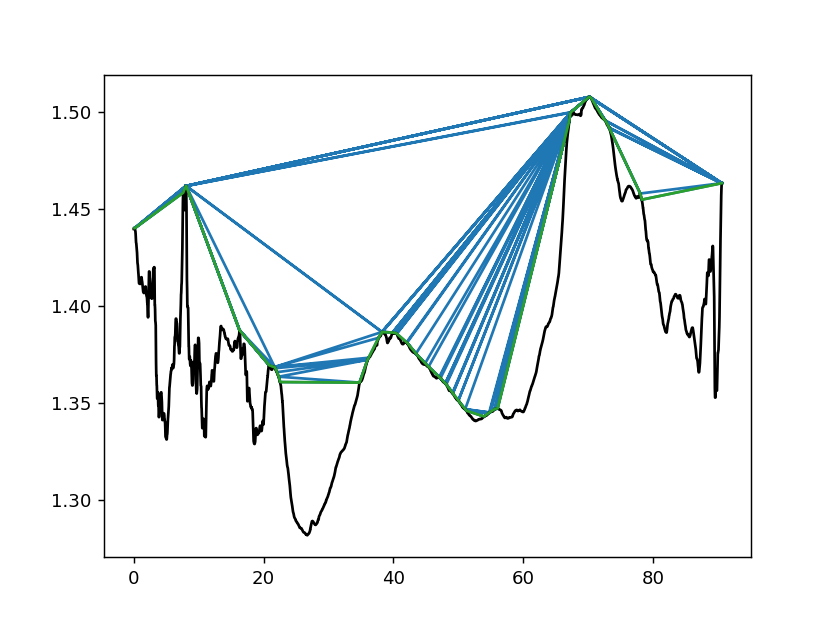

IndexError: arrays used as indices must be of integer (or boolean) type

In [26]:
import matplotlib.pyplot as plt
%matplotlib notebook

plt.plot(orbit.points[:, 0], orbit.points[:, 1], 'k')
plt.triplot(orbit.points[:, 0], orbit.points[:, 1], alpha_arr, color='tab:blue')
plt.plot(orbit.points[bkg, 0], orbit.points[bkg, 1], color='tab:green')
plt.scatter(orbit.points[deps.flatten(), 0], orbit.points[deps.flatten(), 1], marker='x', c='r', zorder=10)

plt.show()

In [27]:
print('orbit_data_length:'+str(len(orbit.points[:,0])))
print('instrument_data_length:'+str(len(ivm['slt'])))

orbit_data_length:5787
instrument_data_length:5787


<IPython.core.display.Javascript object>


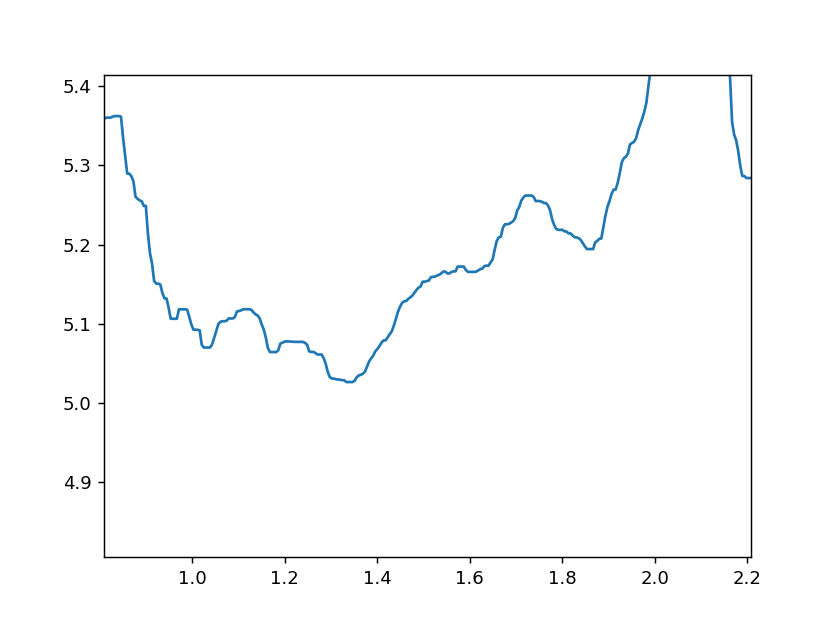

In [28]:
%matplotlib notebook
plt.plot(ivm['slt'], ivm['filt_density'])
plt.scatter(ivm[deps.flatten(), 'slt'], ivm[deps.flatten(), 'filt_density'])

In [41]:
ivm['RPAflag']
ivm.data.index

DatetimeIndex(['2012-01-01 11:18:06', '2012-01-01 11:18:07',
               '2012-01-01 11:18:08', '2012-01-01 11:18:09',
               '2012-01-01 11:18:10', '2012-01-01 11:18:11',
               '2012-01-01 11:18:12', '2012-01-01 11:18:13',
               '2012-01-01 11:18:14', '2012-01-01 11:18:15',
               ...
               '2012-01-01 12:54:23', '2012-01-01 12:54:24',
               '2012-01-01 12:54:25', '2012-01-01 12:54:26',
               '2012-01-01 12:54:27', '2012-01-01 12:54:28',
               '2012-01-01 12:54:29', '2012-01-01 12:54:30',
               '2012-01-01 12:54:31', '2012-01-01 12:54:32'],
              dtype='datetime64[ns]', length=5787, freq='S')

In [5]:
depletions = []
upper_envelope = orbit.get_background()
delta_t = np.diff(orbit.points[upper_envelope, 0])
ind, = np.where(delta_t > 0)
sqsf = np.sqrt(orbit.scale_factor)
print("sqsf")
print(sqsf)
for i in ind:

    lead = upper_envelope[i]
    if orbit.points[lead,0] < 60 or orbit.points[lead,0] > 66:
        continue
#    print("lead:")
#    print(lead)
    trail = upper_envelope[i+1]
#    print("trail:")
#    print(trail)
    d_t = delta_t[i]
    if d_t < 3:
        continue
    print("dt:")
    print(d_t*sqsf)
    dens = orbit.points[lead:trail, 1]
    print("dens")
    print(dens)
    min_edge = (np.min([orbit.points[lead, 1], orbit.points[trail, 1]])) / sqsf
    print("min_edge")
    print(min_edge)
    min_dens = (np.min(dens)) / sqsf
    print("min_dens")
    print(min_dens)
    d_n = (10**min_edge - 10**min_dens) / 10**min_edge
    print("d_n")
    print(d_n)
    print("width_ratio:")
    print((d_t*sqsf)/d_n)
    print("ratio_threshold:")
    print(.6/sqsf)
    if d_n > .1 and (d_t*sqsf)/d_n < .6:
        depletions.append([lead, trail])

sqsf
0.08418909063969596
dt:
0.3635468482971195
dens
[0.36646244 0.36554052 0.36523065 0.36493069 0.36387794 0.36362924
 0.36308681 0.36280255 0.35942322 0.35935    0.35765743 0.35665888
 0.35610095 0.34766426 0.34544977 0.34349875 0.34298    0.34092826
 0.34092826 0.34303568 0.34303568 0.34303568 0.34303568 0.34333508
 0.34333508 0.3444063  0.34333508 0.34285961 0.34285961 0.34333508
 0.34373934 0.3444063  0.34606996 0.34727867 0.34752982 0.34759397
 0.34821063 0.34845663 0.34845663 0.3488209  0.3488209  0.3488209
 0.34898706 0.3492077  0.3492077  0.34898706 0.34789598 0.34789598
 0.34803492 0.34779385 0.34779385 0.3477081  0.34779385 0.34803492
 0.34836101 0.34836101 0.3483708  0.34837422 0.34857117 0.34954848
 0.35017145 0.35023885 0.35072143 0.35090456 0.35156197 0.35329445
 0.35340356 0.35399019 0.35502752 0.35502752 0.35513985 0.3552034
 0.3554761  0.3557891  0.35594643 0.35594643 0.3562663  0.35653684
 0.35695647 0.35706084 0.35721484 0.35722612 0.3573649  0.35841219
 0.36118693